In [1]:
from os.path import splitext
from os import listdir
from os.path import join
import numpy as np
from glob import glob
import torch
from torch.utils.data import Dataset
import logging
from PIL import Image
from torchvision import transforms, utils
import matplotlib.pyplot as plt

x: (512, 512)


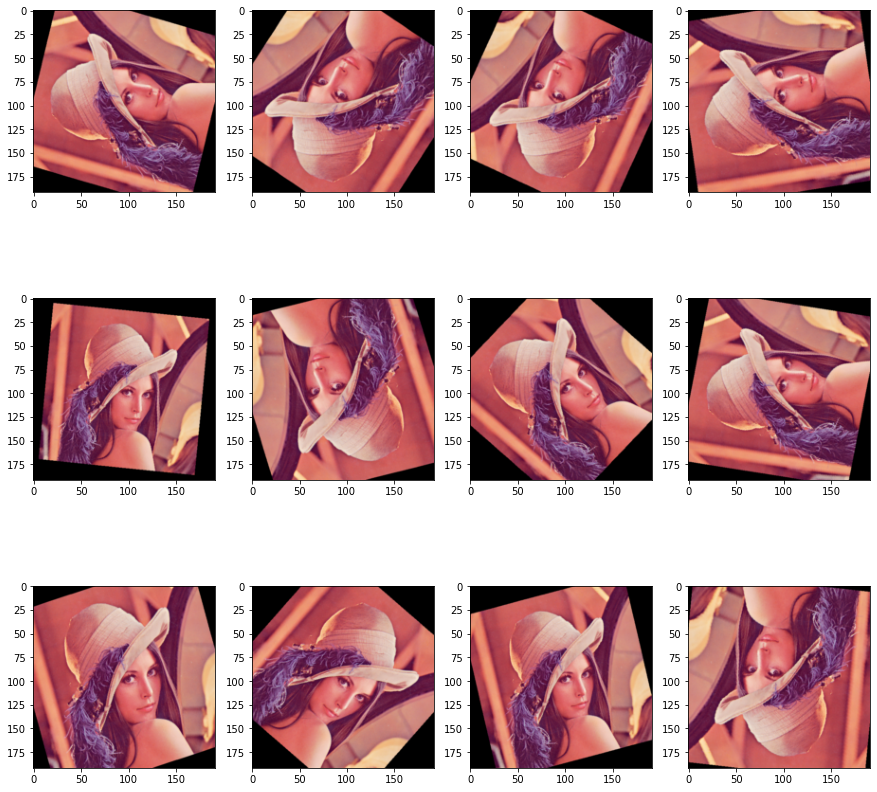

(192, 192)


In [20]:
import torch
from PIL import Image
import torchvision.transforms.functional as TF
import torchvision.transforms as tt
from torchvision import transforms, utils
import matplotlib.pyplot as plt

def transform( img):
    #print('CCCTTCTTCTTTTTTT',CT.shape,CT.dtype)

    if torch.rand(1) < 0.5:
        img = TF.hflip(img)
        #PET = TF.hflip(PET)

    if torch.rand(1) < 0.5:
        img = TF.vflip(img)
        #PET = TF.vflip(PET)

    if torch.rand(1) < 0.8:
        randi = torch.randint(0,360,(1,)).item()
        img = TF.rotate(img, randi)
        #PET = TF.rotate(PET, randi)

    return img


def transform2(img):
    
    i,j,h, w = transforms.RandomCrop.get_params(img, output_size=(300, 300)) #(0, 0, 512, 512)
    img = TF.crop(img, i,j,h, w) 
    img = TF.adjust_brightness(img, 1 + 0.5*(2*torch.rand(1)-1) )  
    
    return img


def transform3(img):

    affine_params = tt.RandomAffine(180).get_params((-90, 90), (1, 1), (0.8, 1.2), (-45, 45),(512,512))
    img = TF.affine(img, *affine_params)

    return img
#STATIC get_params(degrees: List[float], translate: Union[List[float], NoneType], scale_ranges: Union[List[float],
#NoneType], shears: Union[List[float], NoneType], img_size: List[int]) → Tuple[float, Tuple[int, int], float,
# Tuple[float, float]]


def transform4(img):
    #tt.RandomResizedCrop(size, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=<InterpolationMode.BILINEAR: 'bilinear'>)
    affine_params = tt.RandomAffine(0).get_params((0, 0), (0.05, 0.05), (1.85, 2.15), (-5, 5),img_size=(512,512))
    affine_params = tt.RandomAffine(0).get_params((0, 0), (0.05, 0.05), (1.0, 1.0), (0, 0),img_size=(512,512))
    affine_params = tt.RandomAffine(0).get_params((-180, 180), (0.0, 0.0), (0.85, 1.15), (-3, 3),img_size=(0,0))
    img = TF.affine(img, *affine_params)

 
                    
    #transformm = transforms.Compose([
    #        transforms.Resize((round(img.height * 1/2), round(img.width * 1/2))),  # interpolation `BILINEAR` is applied by default
    #        transforms.ToTensor(),
     #       transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
     #   ])
    transformm = tt.Resize((192, 192))
    #print(img.shape)
    img = transformm(img)
    return img   
# torchvision.transforms.RandomAffine(degrees, translate=None, scale=None, shear=None, 
# interpolation=<InterpolationMode.NEAREST: 'nearest'>, fill=0, fillcolor=None, resample=None)



x= Image.open('Lenna.png')

columns = 4
rows = 3
fig3=plt.figure(figsize=(15, 15))
print('x:', x.size)
for i in range(1, columns*rows +1):
    img = transform4(x)
    fig3.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()
print(img.size)

In [15]:
0.6**(0.1)

0.9502002165056764

In [15]:
96*2

192

In [19]:
(512**2)/(192**2)

7.111111111111111